Построить интерполяционный полином Лагранжа для функции f (x) с узлами интерполирования xi, i = 0, 1, 2. Вычислить значения f (x) и полинома Лагранжа в точке a. Построить графики полинома Лагранжа и аппроксимируемой функции f ( x) на отрезке [x0, x2]. Вычислить точно и оценить погрешность интерполяции в этой точке.

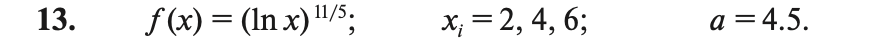

In [13]:
from matplotlib import pyplot as plt
import math
import numpy as np

In [6]:
def lagrange(a, x0, x1, x2, y0, y1, y2):
    return ( 
            (y0 * ((a - x1) * (a - x2)) / ((x0 - x1) * (x0 - x2))) +
            (y1 * ((a - x0) * (a - x2)) / ((x1 - x0) * (x1 - x2))) +
            (y2 * ((a - x0) * (a - x1)) / ((x2 - x0) * (x2 - x1)))
           )

def exact_f(a):
    return math.pow(math.log(a), 5.5)

In [9]:
lag = lagrange(4.5, 2, 4, 6, exact_f(2), exact_f(4), exact_f(6))

exc = exact_f(4.5)

error = abs(exc - lag)

In [12]:
print("Значение функции в точке а = 4.5:")
print(f"Найденные с помощью интерполяционного полинома Лагранжа: {lag}")
print(f"При вычислении с помощью функции math.log(): {exc}")
print(f"Ошибка при вычислении: {error}")

Значение функции в точке а = 4.5:
Найденные с помощью интерполяционного полинома Лагранжа: 9.501585305618612
При вычислении с помощью функции math.log(): 9.440304788406355
Ошибка при вычислении: 0.061280517212257024


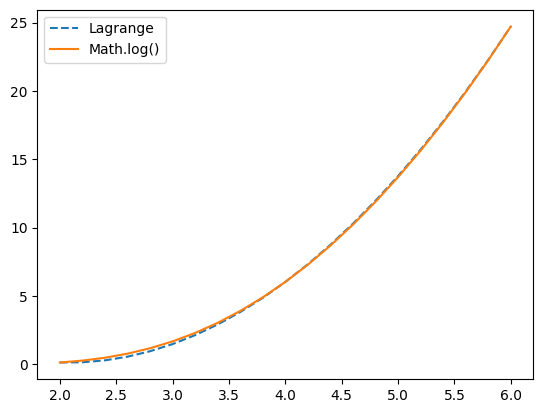

In [20]:
x = np.arange(2, 6.2, 0.2)
y1 = [ lagrange(i, 2, 4, 6, exact_f(2), exact_f(4), exact_f(6)) for i in x ]
y2 = [ exact_f(i) for i in x ]

plt.plot(x, y1, "--")
plt.plot(x, y2)
plt.legend(["Lagrange", "Math.log()"])
plt.show()

Оценнка погрешности: R3(a) <= 0.968873252423263


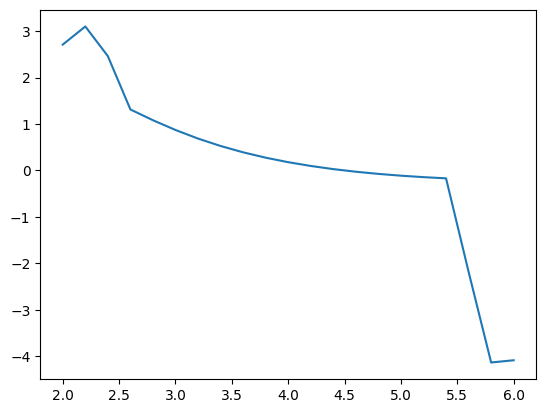

In [26]:
dydx = np.gradient(y2, 0.2)
dydx2 = np.gradient(dydx, 0.2)
dydx3 = np.gradient(dydx2, 0.2)

M3 = np.amax(dydx3)

R3 = M3/6 * abs((4.5-2) * (4.5-4) * (4.5-6))
print(f"Оценнка погрешности: R3(a) <= {R3}")
plt.plot(x, dydx3)
plt.show()